---

<!-- <a href="https://github.com/rraadd88/roux/blob/master/examples/roux_viz_sets.ipynb"><img align="right" style="float:right;" src="https://img.shields.io/badge/-source-cccccc?style=flat-square"></a>
 -->
 
## 📈⬤⬤ Plots of sets.

In [1]:
# installing the required roux subpackage
# !pip install roux[viz]
# loading requirements
import pandas as pd
import matplotlib.pyplot as plt

### Crosstab
**Demo data**

In [2]:
## for linear dfs
def get_demo_data(
    n=100,
    ) -> pd.DataFrame:
    """Demo data to test the differences."""
    import numpy as np
    d={}
    for i in [1,2]:
        np.random.seed(i)
        d[f'c{i}']=np.random.choice(a=[False, True], size=n,p=[0.5,0.5])
    return pd.DataFrame(d)
data=get_demo_data(n=100)
data.head(1)

,c1,c2
0,False,False


### As a table

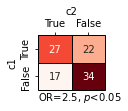

In [3]:
from roux.viz.sets import plot_intersection_counts
ax=plot_intersection_counts(data,['c1','c2'])

### As a bar plot

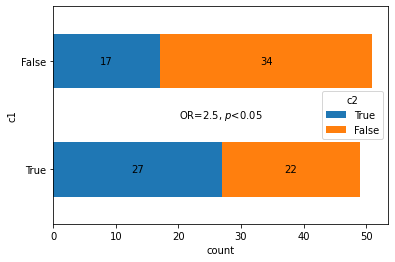

In [4]:
from roux.viz.sets import plot_intersection_counts
ax=plot_intersection_counts(data,['c1','c2'],kind='bar')

### Documentation
[`roux.viz.sets`](https://github.com/rraadd88/roux#module-rouxvizsets)